In [89]:
import FinanceDataReader as fdr
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.5f}'.format


### 모델 개발을 위한 데이터 프로세싱(매수)   
모델 개발을 위해서는 매수 전략에 따라 매수 종목을 결정할 수 있어야 합니다.이번 장에서는 기본적인 몇 가지 매수 종목을 찾는 데이터처리를 진행해 보겠습니다. 저장해 둔 mdl_data pickle 파일을 읽습니다.


In [156]:
mdl_data = pd.read_pickle('mdl_data.pkl')

### <br>매수 전략 1 - 시장 수익율보다 더 좋은 수익율을 보인 종목을 매수
시장 수익율보다 더 좋은 수익율을 보인 종목을 알기 위해 4.4.5 절에 'win_market' 이라는 변수를 생성했습니다. 이것을 이용할 것인데요. 더 의미있는 지표를 생성하기 위해서 당일 하루 보다 과거 60일 누적합을 보겠습니다. 수익율은 max_return 이용하겠습니다.


In [301]:
kosdaq_list = pd.read_pickle('kosdaq_list.pkl')

data_all_3 = pd.DataFrame()

for code in kosdaq_list['code']:
    
    # 종목별 처리
    data = mdl_data[mdl_data['code']==code].sort_index().copy()
    
    # win_market 누적 합
    data['win_market_sum'] = data['win_market'].rolling(60).sum() 
    
        # 고가, 저가, 종가 수익율
    for i in [1,2,3,4,5]:

        data['high_r' + str(i)] = data['high'].shift(-1*i)/data['close']      
        data['low_r' + str(i)] = data['low'].shift(-1*i)/data['close']   
        data['close_r' + str(i)] = data['close'].shift(-1*i)/data['close']    
        
    data['max_close']  = data[['close_r1','close_r2','close_r3','close_r4','close_r5']].max(axis=1) 
    data.dropna(subset=['win_market_sum','close_r1','close_r2','close_r3','close_r4','close_r5'], inplace=True)    
 
    data_all_3 = pd.concat([data, data_all_3], axis=0)

data_all_3.to_pickle('data_all_3.pkl')    
data_all_3.head()    

,open,high,low,close,volume,change,code,name,kosdaq_return,return,...,high_r1,low_r1,high_r2,low_r2,high_r3,low_r3,high_r4,low_r4,high_r5,low_r5
date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,13350,13350,13100,13100,103171,-0.01504,238490,힘스,0.99803,0.98496,...,1.04198,1.00000,1.04198,1.01527,1.05344,1.02290,1.06107,1.03053,1.06489,1.03053
2021-04-01,13100,13650,13100,13400,194185,0.02290,238490,힘스,1.01005,1.02290,...,1.01866,0.99254,1.02985,1.00000,1.03731,1.00746,1.04104,1.00746,1.04851,1.02612
2021-04-02,13500,13650,13300,13500,136673,0.00746,238490,힘스,1.00446,1.00746,...,1.02222,0.99259,1.02963,1.00000,1.03333,1.00000,1.04074,1.01852,1.02963,1.01481
2021-04-05,13600,13800,13400,13700,219062,0.01481,238490,힘스,0.99967,1.01481,...,1.01460,0.98540,1.01825,0.98540,1.02555,1.00365,1.01460,1.00000,1.01095,0.98905
2021-04-06,13800,13900,13500,13650,135914,-0.00365,238490,힘스,0.99882,0.99635,...,1.02198,0.98901,1.02930,1.00733,1.01832,1.00366,1.01465,0.99267,1.00733,0.99634


win_market_sum
(-0.001, 4.0]   1.02213
(4.0, 5.0]      1.03136
(5.0, 6.0]      1.03094
(6.0, 7.0]      1.03165
(7.0, 8.0]      1.03202
(8.0, 9.0]      1.03370
(9.0, 11.0]     1.03646
(11.0, 22.0]    1.03989
Name: max_close, dtype: float64


<AxesSubplot:xlabel='win_market_sum'>

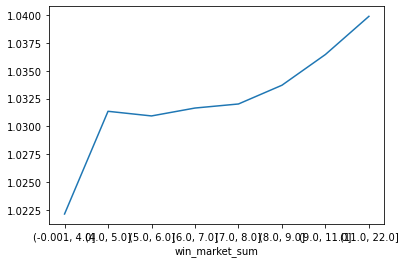

In [344]:
data_all_3 = pd.read_pickle('data_all_3.pkl')    
ranks = pd.qcut(data_all_3['win_market_sum'], q=8)
print(data_all_3.groupby(ranks)['max_close'].mean())
data_all_3.groupby(ranks)['max_close'].mean().plot()

### <br>메수 전략 2 - 섹터 평균 수익율보다 더 높은 수익율을 보인 종목을 매수
kosdaq_list 에 있는 종목별 섹터 정보를 이용하겠습니다. 우선, 종목별 최근 60일 평균 수익율을 rolling 함수를 이용하여 으로 계산합니다. for Loop 을 이용하여 종목에 섹터 정보를 추가합니다. 


In [ ]:
kosdaq_list = pd.read_pickle('kosdaq_list.pkl')

data_all_4 = pd.DataFrame()

for code, sector in zip(kosdaq_list['code'], kosdaq_list['sector']):
    
    # 종목별 처리
    data = mdl_data[mdl_data['code']==code].sort_index().copy()
    data.dropna(inplace=True)
    
    # 최근 60일 평균 수익율            
    data['return_mean'] = data['return'].rolling(60).mean()
    data['sector'] = sector     
  
    data.dropna(subset=['return_mean'], inplace=True)    
    data_all_4 = pd.concat([data, data_all_4], axis=0)

data_all_4.to_pickle('data_all_4.pkl')      

최근 60 일 평균수익율 정보를 섹터 별, 일 별로 요약한 평균을 추가합니다. 이때 apply 대신 Transform 함수가 이용되었습니다. apply 는 그룹의 숫자 만큼 행을 리턴하나, transform 은 그룹핑 전의 데이터 수를 리턴합니다. 결과를 보니, 섹터를 이용하여 종목을 선정할 때는 섹터 평균 수익율보다 많이 높거나, 많이 낮는 종목을 선정하는 것이 수익율이 좋게 나왔습니다. 섹터 평균 수익율 대비 종목 수익율은 미래 수익율 예측에 도움이 되는 정보입니다.

In [353]:
data_all_4 = pd.read_pickle('data_all_4.pkl') 
data_all_4['sector_return'] = data_all_4.groupby(['sector', data_all_4.index])['return'].transform(lambda x: x.mean())
data_all_4['return code/sector'] = (data_all_4['return']/data_all_4['sector_return'])

                      mean     std     min  median     max
return code/sector                                        
(0.378, 0.974]     1.04148 0.08541 0.70000 1.02165 2.96831
(0.974, 0.984]     1.03379 0.06697 0.70175 1.01818 2.17134
(0.984, 0.99]      1.03004 0.06130 0.69996 1.01578 2.32955
(0.99, 0.994]      1.02782 0.05881 0.70113 1.01395 2.26860
(0.994, 0.999]     1.02716 0.05841 0.70794 1.01292 2.72908
(0.999, 1.002]     1.02876 0.06561 0.69999 1.01321 3.70053
(1.002, 1.007]     1.02652 0.05928 0.70000 1.01215 3.02721
(1.007, 1.013]     1.02773 0.06178 0.70045 1.01282 3.37950
(1.013, 1.026]     1.03059 0.06685 0.32624 1.01433 2.41152
(1.026, 1.399]     1.04236 0.10334 0.70000 1.01852 3.70267


<AxesSubplot:xlabel='return code/sector'>

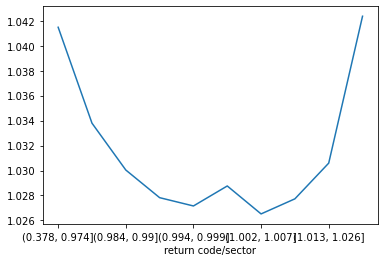

In [354]:
ranks = pd.qcut(data_all_4['return code/sector'], q=10)
print(data_all_4.groupby(ranks)['max_close'].agg(['mean','std','min','median','max']))
data_all_4.groupby(ranks)['max_close'].mean().plot()